Firstly, we import the used libraries:

In [39]:
import os
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

Now we declare the variables that will be uses throught the program, where the images of training and testing which will be stored in dictinaries that hold the values 'filename', 'label' and 'data'. Where 'label' is the image tag and 'data' the image itself.

In [40]:
train_dict = dict()
train_dict['filename'] = []
train_dict['label'] = []
train_dict['data'] = []
test_dict = dict()
test_dict['filename'] = []
test_dict['label'] = []
test_dict['data'] = []
y_prediction = []
width = 250
height = 350

Definition of the function introduce_data() which is in charge of introducing the images' data into their corresponging dictonaries. THe images are imported using the opencv library, and they are reshaped to be stored in a smaller (and equal) size.

In [41]:
def introduce_data(path, label, train_dict, test_dict):
    for file in os.listdir(path):
        if file == "train":
            y_path = os.path.join(path, file)
            for picture in os.listdir(y_path):
                pic_path = os.path.join(y_path, picture)
                im = cv2.imread(pic_path)
                im = cv2.resize(im, (width, height))
                train_dict['data'].append(im)
                train_dict['label'].append(label)
                train_dict['filename'].append(picture)
        else:
            x_path = os.path.join(path, file)
            for picture in os.listdir(x_path):
                pic_path = os.path.join(x_path, picture)
                im = cv2.imread(pic_path)
                im = cv2.resize(im, (width, height))
                test_dict['data'].append(im)
                test_dict['label'].append(label)
                test_dict['filename'].append(picture)

We continue with the definition of the train() function. This fucntion trains the algorithm with the images passed by argument and returns a prediction based on the test images.

In [42]:
def train(train_dict, test_dict):
    x_train = np.array(train_dict['data'], dtype=float)
    x_train = np.reshape(x_train, (x_train.shape[0], -1))
    y_train = np.array(train_dict['label'])
    clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
    clf.fit(x_train, y_train)

    x_test = np.array(test_dict['data'], dtype=float)
    x_test = np.reshape(x_test, (x_test.shape[0], -1))
    y_prediction = clf.predict(x_test)
    z = 0
    print("PREDICTION" + " - " + "TRUE VALUE")
    for z in range(10):
        rand = random.randint(0, len(y_prediction))
        
        print(y_prediction[rand] + "  ->  " + test_dict['label'][rand])
    return y_prediction

Once the functions are defined we can call them to store the images and get the predcitions. The images are taken from the path stored in the vaariable 'path'.

In [43]:
path = "C:\\Users\\Usuari\\Desktop\\Database"
label = ""
for file in os.listdir(path):
    if file == "Documents":
        label = "Document"
    if file == "Plans":
        label = "Plan"
    if file == "Tickets":
        label = "Ticket"
        file = file + "\\imges"

    new_path = os.path.join(path, file)
    introduce_data(new_path, label, train_dict, test_dict)

Produce predicted values and print some of them randomly.

In [44]:
y_prediction = train(train_dict, test_dict)

PREDICTION - TRUE VALUE
Document  ->  Document
Plan  ->  Plan
Document  ->  Document
Plan  ->  Plan
Plan  ->  Plan
Document  ->  Document
Ticket  ->  Ticket
Document  ->  Document
Ticket  ->  Ticket
Plan  ->  Plan


Finally, we calculate the confussion matrix with a function from the sklearn library. We normalize the values to make them more understandable.

Accuracy: 94.44444444444444


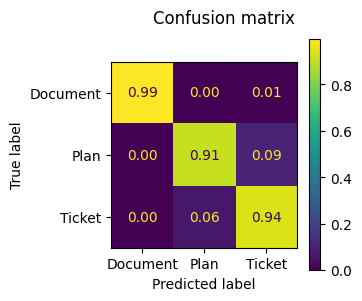

In [46]:
label_names = ['Document', 'Plan', 'Ticket']
cmx = confusion_matrix(y_prediction, test_dict['label'], labels=label_names, normalize="true")
graph = ConfusionMatrixDisplay(cmx, display_labels=label_names)
fig, ax = plt.subplots(figsize=(3,3))
graph.plot(ax=ax, values_format='.2f')
fig.suptitle("Confusion matrix")

print("Accuracy: " + str(100*np.sum(y_prediction == test_dict['label'])/len(test_dict['label'])))
plt.imshow(cmx)